# Bike Sharing Demand Practice for AIFFEL

# 1. 자전거 대여 수요 예측 경진대회 탐색적 데이터 분석
    즐거운 캐글 시간 🌟🐬🐋🐧❤💚🐇🌼🌹~

## 1.1 데이터 둘러보기

In [85]:
import numpy as np 
import pandas as pd 


### api로 kaggle 데이터 받아오기

In [86]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyboardInterrupt: ignored

In [87]:
ls -1ha kaggle.json

kaggle.json


In [88]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [89]:
! kaggle competitions download -c bike-sharing-demand

# !다음에 복사한 api 붙여넣고 맨 마지막에는 저장할 경로 설정해주기

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [90]:
!ls
# 확인

bike-sharing-demand.zip  kaggle.json  sampleSubmission.csv  train.csv
drive			 sample_data  test.csv


In [91]:
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### 데이터 불러오기

In [105]:
# 데이터 경로
data_path = '/content/'
train = pd.read_csv(data_path + 'train.csv')
# 이런식으로 하면 경로의 해당 파일을 불러올 수 있다.
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [106]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [107]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [108]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [109]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


제출파일의 첫 5줄입니다! 시간 별로 카운트를 예측한 결과값이 담기겠죠???

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


info 함수로 들여다 보니 한결 간결하게 표현이 되네요. 하나 알아갑니다. 정말 많이 쓸 것 같아요.
* datetime
* season
* holiday
* workingday
* weather
* temp
* atemp
* humidity
* windspeed
* casual
* registered
* count    
총 11개 column들이 있어요.

In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


test 데이터에는 casual과 registered,count와 같은 column들이 빠져있습니다. 학습에 불필요한 데이터임이 자명하기 때문인가봐요.

## 1.2 더 효과적인 분석을 위한 피처 엔지니어링

In [112]:
print(train['datetime'][100])
# datetime의 100번째 요소
print(train['datetime'][100].split())
# 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0])
# 날짜
print(train['datetime'][100].split()[1])
# 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


그렇습니다. 우리에겐 split 메서드가 있었어요. Ex에서는 데이터형식을 datetime으로 바꿔서 변환하는 함수를 사용했는데 ..

In [113]:
print(train['datetime'][100].split()[0])
# 날짜
print(train['datetime'][100].split()[0].split('-'))
# - 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split('-')[0])
# 연도
print(train['datetime'][100].split()[0].split('-')[1])
# 월
print(train['datetime'][100].split()[0].split('-')[2])


2011-01-05
['2011', '01', '05']
2011
01
05


In [114]:
print(train['datetime'][100].split()[1])
# 시간
print(train['datetime'][100].split()[1].split(':'))
# : 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(':')[0])
# 시간
print(train['datetime'][100].split()[1].split(':')[1])
# 분
print(train['datetime'][100].split()[1].split(':')[2])
# 초

09:00:00
['09', '00', '00']
09
00
00


아직 변환해서 새로 컬럼을 만들어 놓은 것은 아니고 , 이렇게 나누면 된다~ 고 보여주는 것 같습니다. 해당 코드를 이용해서 새로 컬럼을 만들어 보겠습니다.

In [115]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
# date column 만들고, datetime column에 공백을 기준으로 나눈 것 중 0번째 ( 날짜)

train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])



In [116]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


잘 담겼네요?

In [119]:
from datetime import datetime
# datetime 라이브러리 가져오기
import calendar # 파이썬 캘린더 라이브러리임

print(train['date'][100])
# 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))
# strptime : 다양한 포멧의 문자열을 datetime 타입으로 변경해주는 메서드
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
# weekday() : 월요일을 0으로 해서 요일을 정수로 바까줌 (isoweekday는 월욜이 1)
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])
# calendar.day_name : day_name 자체는 요일 정보를 담고있는 객체. 
# ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 이렇게
# 해당 datetime의 요일을 정수로 받은 값을 day_name에 넣으면 해당 정수가 나오겠죠?
# 문자열로 요일을 반환합니다.

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [120]:
train['weekday'] = train['date'].apply(lambda dateString:calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
# weekday 컬럼 만들고 train의 date 컬럼 데이터를 지지고볶아서 문자열로 요일 바꾼걸 넣어줍니다.
                                      

In [121]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


잘담김

In [122]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})

train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunder',
                                         4: 'Heavy Snow, Rain, Thunder'
                                         })

In [123]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


season과 weather가 1-4값이었는데, 데이터셋 description을 보면 각각 숫자에 해당하는 설명이 나와있습니다. 그걸 토대로 상세한 날씨와 계절로 바꾼 것 같습니다. 시각화를 하기 위해서일까요? 보통은 문자열 데이터를 숫자로 바꿔주지 않나요? 지켜봅시다 👀

## 1.3 데이터 시각화

In [124]:
import seaborn as sns
import matplotlib as mpl # plt말고 mpl? 고대로 읽으면 mpl이긴 하지
import matplotlib.pyplot as plt # 이걸 plt로 읽어오기 위해서였구나
# 필자는 pyplot 모듈로 시각화를 더 많이 해서 아예 지정했나봅니다.
%matplotlib inline

분포도

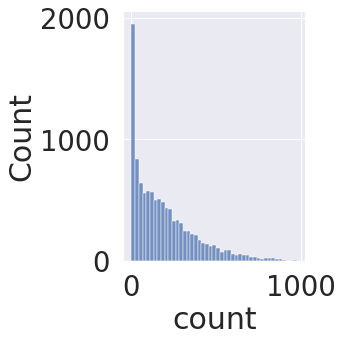

In [125]:
mpl.rc('font', size = 15) # 폰트크기 15
sns.displot(train['count']) # count컬럼 분포도


그래프가 옹졸하다.. 분포가 치우쳐있다!

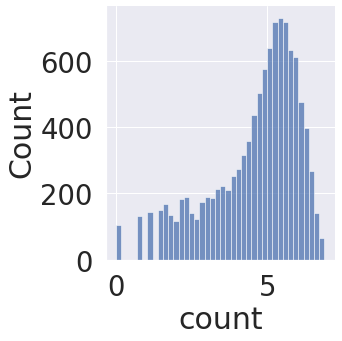

In [126]:
sns.displot(np.log(train['count']));

왜 log만 취해줬지? 보통은 분포도 정규화 하려면 log1p 해주지않나?

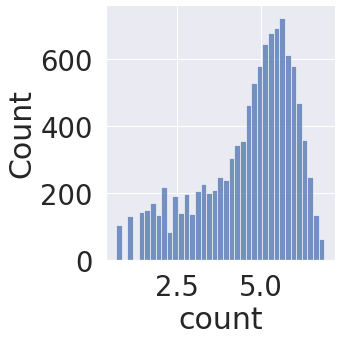

In [127]:
sns.displot(np.log1p(train['count']));

별차이업내요

막대 그래프

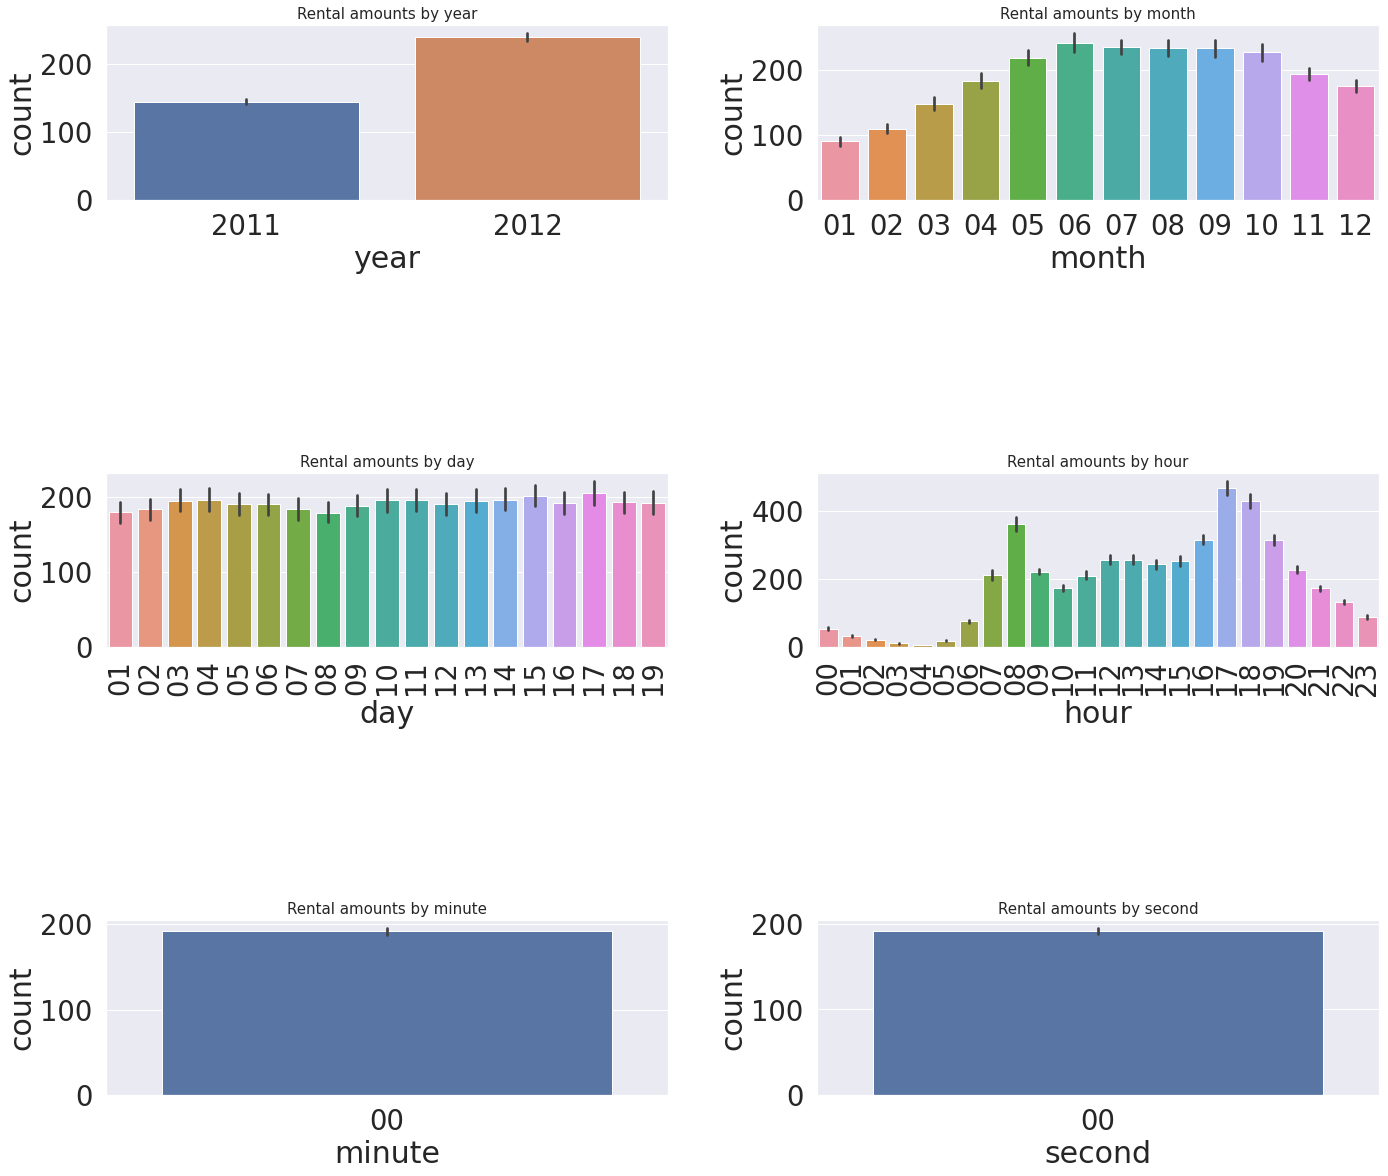

In [133]:
# 스텝1 : m행 n열 figure 준비!

mpl.rc('font', size = 5) #폰트크기
mpl.rc('axes', titlesize = 15) # 타이틀크기
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행2열 생성!!
plt.tight_layout() # 이건처음보는데 그래프 사이에 여백 확보
figure.set_size_inches(20,19) # 전체 figure 크기를 조절 근데 내컴퓨터에서는 너무 작았다.. 20,19로 바꿈

# 스텝2 : 각 축에 서브플롯 할당! (막대)
sns.barplot(x='year', y='count', data = train, ax = axes[0,0])
sns.barplot(x='month', y='count', data = train, ax = axes[0,1])
sns.barplot(x='day', y = 'count', data = train, ax = axes[1,0])
sns.barplot(x='hour', y = 'count', data = train, ax = axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax = axes[2,0])
sns.barplot(x='second',y = 'count', data=train, ax = axes[2,1])

# step 3 : 세부 설정
# 3-1:서브플롯에 제목 달자

axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)


박스플롯

In [ ]:
# 스텝1 :

In [134]:
git remote add origin https://github.com/itchyfeet-patient/kaggle-BikeSharingDemand.git
git branch -M 'main'
git push -u origin 'main'

SyntaxError: ignored